In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ndtv_data_final.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [4]:
# first check column names
df.columns

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [5]:
# then check types
df.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

In [6]:
# now lets move categoriacal variables
# first i am going to work with continuous variables
cat_feat = ['Unnamed: 0', 'Name', 'Brand', 'Model', 'Touchscreen', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
data = df.drop(cat_feat, axis=1, inplace=False)
data.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


In [7]:
# let's see basical data
data.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [8]:
data.groupby('Processor').mean()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
Processor,,,,,,,,,,
1,2116.166667,4.310476,590.952381,1013.190476,1129.357143,10.665714,6.733333,2.578571,1.666667,7861.095238
2,1984.600000,4.403333,555.200000,935.644444,993.955556,9.600000,6.742222,1.055556,1.466667,7929.444444
4,2606.544656,5.015710,684.576867,1197.647145,1658.986823,15.191801,8.586091,4.299707,1.875549,7209.401171
6,3138.550000,5.719000,1115.250000,2128.100000,3100.000000,48.800000,13.615000,6.500000,1.550000,39365.400000
8,3466.513274,5.751487,989.189381,1899.246018,3683.185841,51.858407,17.008142,11.159469,1.835398,16193.927434
10,3400.000000,5.500000,1080.000000,1920.000000,3500.000000,32.000000,17.750000,9.250000,1.750000,8542.000000


In [9]:
data.isnull().sum()

Battery capacity (mAh)    0
Screen size (inches)      0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Number of SIMs            0
Price                     0
dtype: int64

In [10]:
# lets make normalization method and take those columns that can effect price

# with the method of max and min normalization we can make values interactive
normalized_df = data.apply(lambda x: (x - x.min())/ (x.max()-x.min()))

normalized_df


,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,0.616232,0.871429,0.625000,0.795455,0.777778,1.000000,0.499937,0.444444,0.333333,0.5,0.335274
1,0.599198,0.836735,0.437500,0.590909,0.777778,0.497319,0.124891,0.592593,0.333333,0.5,0.157625
2,0.592986,0.836735,0.521875,0.672727,0.555556,0.329759,0.124891,0.111111,0.250000,0.5,0.609790
3,0.420842,0.755102,0.306250,0.418182,0.555556,0.329759,0.124891,0.111111,0.250000,0.5,0.357636
4,0.599198,0.816327,0.437500,0.573864,0.777778,0.497319,0.249906,0.111111,0.666667,0.0,0.283651
...,...,...,...,...,...,...,...,...,...,...,...
1354,0.098196,0.326531,0.125000,0.136364,0.333333,0.037534,0.015502,0.046296,0.006250,0.5,0.012063
1355,0.198397,0.530612,0.125000,0.151705,0.333333,0.078418,0.015502,0.074074,0.104167,0.5,0.014018
1356,0.138277,0.428571,0.125000,0.151705,0.111111,0.037534,0.007688,0.046296,0.041667,0.5,0.014356
1357,0.048096,0.326531,0.125000,0.136364,0.000000,0.016086,0.000875,0.018519,0.006250,0.5,0.011485


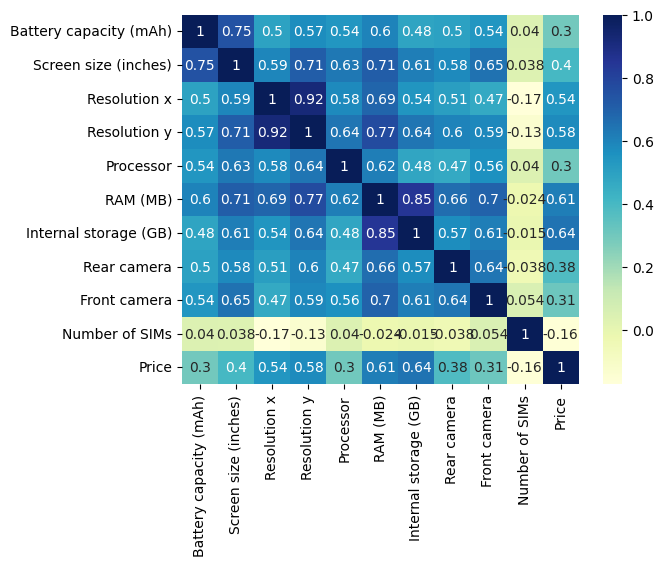

In [11]:
# Now lets calculate correlation of numeric columns to price
data.corr()
# Plotting correlation heatmap
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [12]:
# i want to exclude number of sims becase i has negative correlation
normalized_df.drop('Number of SIMs', axis=1, inplace=True)
if "Number of SIMs" in normalized_df.columns:
    print("Not removed!")
else:
    print("Removed!")

Removed!


In [13]:
# to make the priorities of columns that have stronger effect to price we will multiply correlation numbers to the column values
# calculate correlation of each column with the target (e.g., Price)
correlations = data.corr()["Price"].drop(["Price", "Number of SIMs"])  # Exclude self-correlation
correlations.index

Index(['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x',
       'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)',
       'Rear camera', 'Front camera'],
      dtype='object')

In [14]:
# do not forget that data variable is normalized to normalized_df variable, but correlation is checked with actual data
print(normalized_df.head())
effective_data = normalized_df[correlations.index].mul(correlations.values, axis=1)
effective_data.head()

   Battery capacity (mAh)  Screen size (inches)  Resolution x  Resolution y  \
0                0.616232              0.871429      0.625000      0.795455   
1                0.599198              0.836735      0.437500      0.590909   
2                0.592986              0.836735      0.521875      0.672727   
3                0.420842              0.755102      0.306250      0.418182   
4                0.599198              0.816327      0.437500      0.573864   

   Processor  RAM (MB)  Internal storage (GB)  Rear camera  Front camera  \
0   0.777778  1.000000               0.499937     0.444444      0.333333   
1   0.777778  0.497319               0.124891     0.592593      0.333333   
2   0.555556  0.329759               0.124891     0.111111      0.250000   
3   0.555556  0.329759               0.124891     0.111111      0.250000   
4   0.777778  0.497319               0.249906     0.111111      0.666667   

      Price  
0  0.335274  
1  0.157625  
2  0.609790  
3  0.357636 

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera
0,0.183345,0.350717,0.337944,0.458303,0.235271,0.613446,0.321999,0.168498,0.103557
1,0.178277,0.336754,0.236561,0.340454,0.235271,0.305079,0.080439,0.224664,0.103557
2,0.176428,0.336754,0.282184,0.387593,0.168051,0.202289,0.080439,0.042124,0.077668
3,0.125211,0.303900,0.165593,0.240936,0.168051,0.202289,0.080439,0.042124,0.077668
4,0.178277,0.328541,0.236561,0.330633,0.235271,0.305079,0.160959,0.042124,0.207114


In [15]:
effective_data["Quality"] = effective_data.mean(axis=1)
effective_data["Price"] = normalized_df["Price"]
effective_data["Value"] = np.where(
    effective_data["Price"] != 0,  # Condition: Price is not 0
    effective_data["Quality"] / effective_data["Price"],  # Value if True
    pd.NA # Value if False
)
effective_data.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Quality,Price,Value
0,0.183345,0.350717,0.337944,0.458303,0.235271,0.613446,0.321999,0.168498,0.103557,0.308120,0.335274,0.919009
1,0.178277,0.336754,0.236561,0.340454,0.235271,0.305079,0.080439,0.224664,0.103557,0.226784,0.157625,1.438753
2,0.176428,0.336754,0.282184,0.387593,0.168051,0.202289,0.080439,0.042124,0.077668,0.194837,0.609790,0.319514
3,0.125211,0.303900,0.165593,0.240936,0.168051,0.202289,0.080439,0.042124,0.077668,0.156246,0.357636,0.436885
4,0.178277,0.328541,0.236561,0.330633,0.235271,0.305079,0.160959,0.042124,0.207114,0.224951,0.283651,0.793055


In [16]:
client_profit = effective_data['Value'].max()
client_profit = effective_data[effective_data['Value']==client_profit]
client_profit

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Quality,Price,Value
343,0.21107,0.295687,0.236561,0.261887,0.235271,0.202289,0.080439,0.045635,0.129447,0.188699,0.002865,65.854269


In [17]:
business_profit = effective_data['Value'].min()
business_profit = effective_data[effective_data['Value']==business_profit]
business_profit

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Quality,Price,Value
591,0.026235,0.003285,0.0,0.0,0.0,0.023025,0.000564,0.007021,0.0,0.006681,0.037279,0.179218
